In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [6]:
dfe = pd.read_csv('r490.csv')
orig_n = dfe.shape[0]
dfe = dfe[dfe['r1_charge_heater'] > 0]

Min CH: 4972.982873


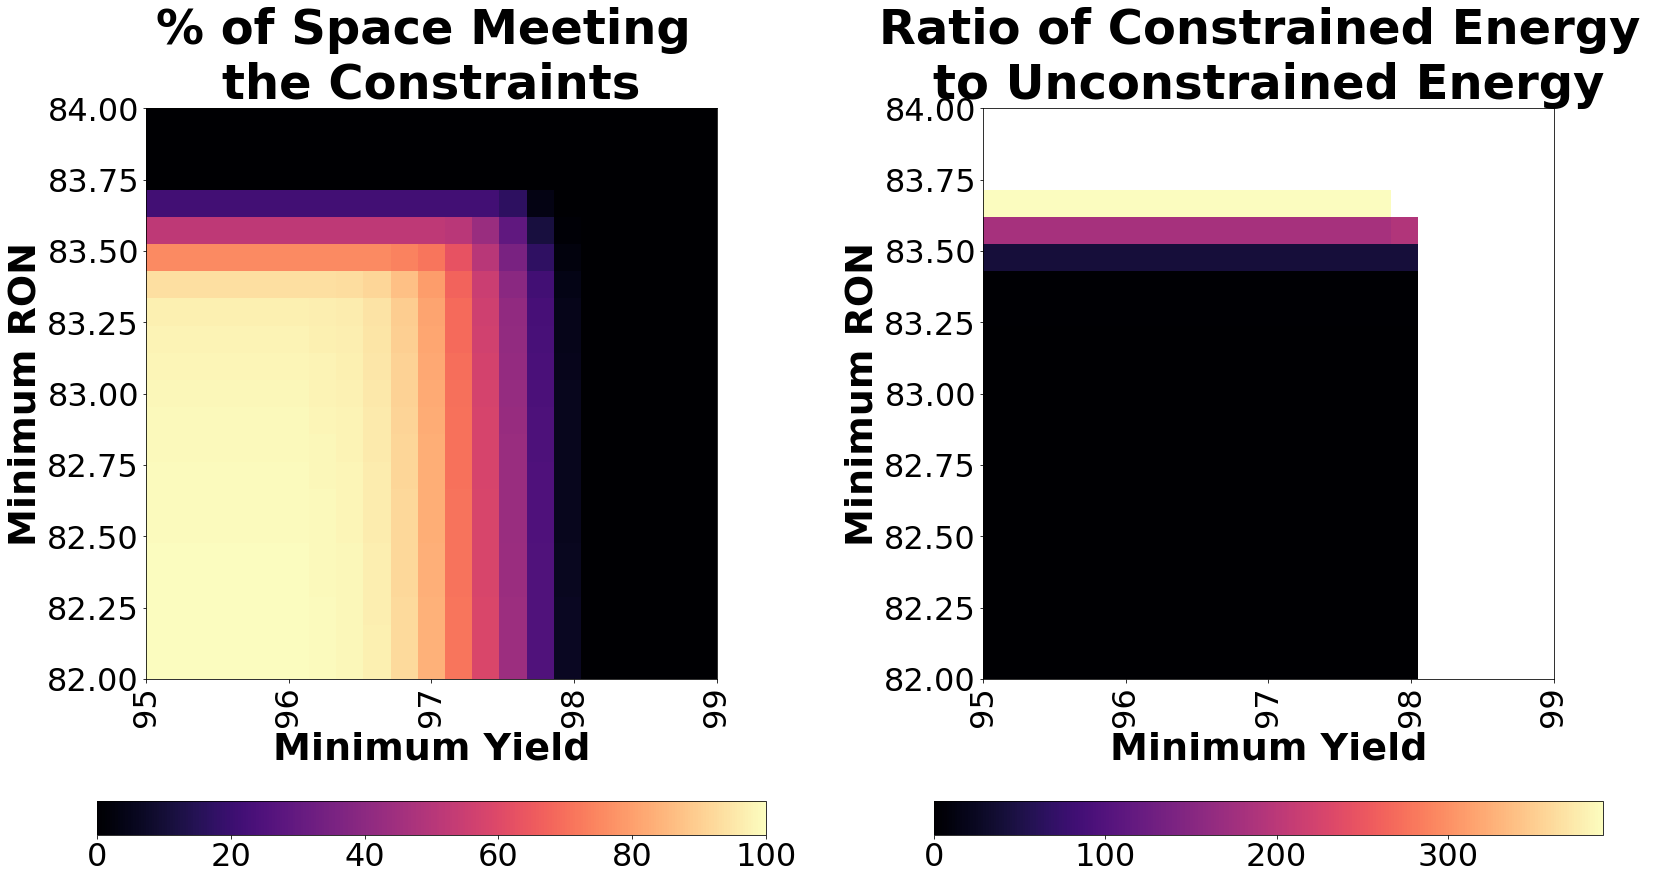

In [4]:
min_rons = np.linspace(82, 84, 21)
min_yields = np.linspace(95, 99, 21)
opt_ch = np.zeros((min_rons.shape[0], min_yields.shape[0]))
opt_size = np.zeros((min_rons.shape[0], min_yields.shape[0]))
for i in range(min_rons.shape[0]):
    for j in range(min_yields.shape[0]):
        min_ron = min_rons[i]
        min_yield = min_yields[j]
        ix = (dfe['process_ron'] >= min_ron) & (dfe['process_yield'] >= min_yield)
        if np.sum(ix) > 0:
            sdf = dfe[ix]
            opt_ch[i, j] = np.min(sdf['r1_charge_heater'])
            opt_size[i, j] = np.sum(ix)
        else:
            opt_ch[i,j] = np.nan
            
min_ch = np.min(dfe['r1_charge_heater'])
print("Min CH: %f" % min_ch)

f, axes = plt.subplots(1, 2, figsize=(30, 15))

ax = axes[0]
M = opt_size * 100/ dfe.shape[0]

im = ax.imshow(M, origin='lower', vmin=0, cmap='magma', extent=[95, 99, 82, 84], aspect=2)

ax.tick_params(axis='x', labelsize=32, rotation=90)
ax.tick_params(axis='y', labelsize=32)

ax.set_xlabel('Minimum Yield', fontsize=38, fontweight='bold')
ax.set_ylabel('Minimum RON', fontsize=38, fontweight='bold')
cbar = f.colorbar(im, ax=ax, shrink=0.8, orientation='horizontal')
cbar.ax.tick_params(labelsize=32) 

ax.set_title('% of Space Meeting \nthe Constraints', fontsize=48, fontweight='bold')

n,m = opt_ch.shape
M = opt_ch / min_ch

ax = axes[1]
im = ax.imshow(M, origin='lower', vmin=0, cmap='magma', extent=[95, 99, 82, 84], aspect=2)

ax.tick_params(axis='x', labelsize=32, rotation=90)
ax.tick_params(axis='y', labelsize=32)

ax.set_xlabel('Minimum Yield', fontsize=38, fontweight='bold')
ax.set_ylabel('Minimum RON', fontsize=38, fontweight='bold')
cbar = f.colorbar(im, ax=ax, shrink=0.8, orientation='horizontal')
cbar.ax.tick_params(labelsize=32) 
ax.set_title('Ratio of Constrained Energy \nto Unconstrained Energy', fontsize=48, fontweight='bold')

#f.tight_layout()
f.subplots_adjust(wspace=0)

plt.savefig("tmp/fig7.tiff", bbox_inches='tight', transparent=True, pad_inches=0, dpi=300, pil_kwargs={"compression": "tiff_lzw"})


In [8]:
M = opt_size * 100/ dfe.shape[0]

unrolled = [(min_rons[i], min_yields[j], M[i, j]) for i in range(min_rons.shape[0]) for j in range(min_yields.shape[0])]
unrolled = np.array(unrolled)
unrolled = unrolled[unrolled[:, 2] > 0, :]

ix = np.argsort(unrolled[:,2])
unrolled[ix[:20],:]

array([[83.6       , 98.        ,  0.83798883],
       [83.5       , 98.        ,  2.51396648],
       [83.7       , 97.8       ,  3.56424581],
       [83.4       , 98.        ,  3.96648045],
       [83.3       , 98.        ,  4.69273743],
       [83.2       , 98.        ,  4.91620112],
       [83.1       , 98.        ,  5.19553073],
       [83.        , 98.        ,  5.47486034],
       [82.9       , 98.        ,  5.58659218],
       [82.7       , 98.        ,  5.75418994],
       [82.6       , 98.        ,  5.75418994],
       [82.8       , 98.        ,  5.75418994],
       [82.5       , 98.        ,  5.77653631],
       [82.4       , 98.        ,  6.03351955],
       [82.3       , 98.        ,  6.03351955],
       [82.2       , 98.        ,  6.25698324],
       [82.        , 98.        ,  6.31284916],
       [82.1       , 98.        ,  6.31284916],
       [83.6       , 97.8       , 11.48603352],
       [83.7       , 97.6       , 17.0726257 ]])